# Market Segmentation Study Task

### Abhishek Jaden Vethanayagam - Feynn Labs Internship
---


### Import Libraries
---


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering


### Load and prepare data
---

In [23]:
df = pd.read_csv(r"C:\feynn 2nd project\McDonalds Case Study-20250715T102348Z-1-001\McDonalds Case Study\mcdonalds.csv")

# Encode
yes_no_columns = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast',
                  'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']
for col in yes_no_columns:
    df[col] = df[col].map({'Yes':1, 'No':0})

df['Like'] = df['Like'].replace({'-3': -3, '-2': -2, '-1': -1, '0':0, '+1':1, '+2':2, '+3':3, '+4':4})
df_encoded = pd.get_dummies(df, columns=['Gender', 'VisitFrequency'], drop_first=True)
X = df_encoded.drop(columns=['Like'])


### Dendrogram to find cluster count
---


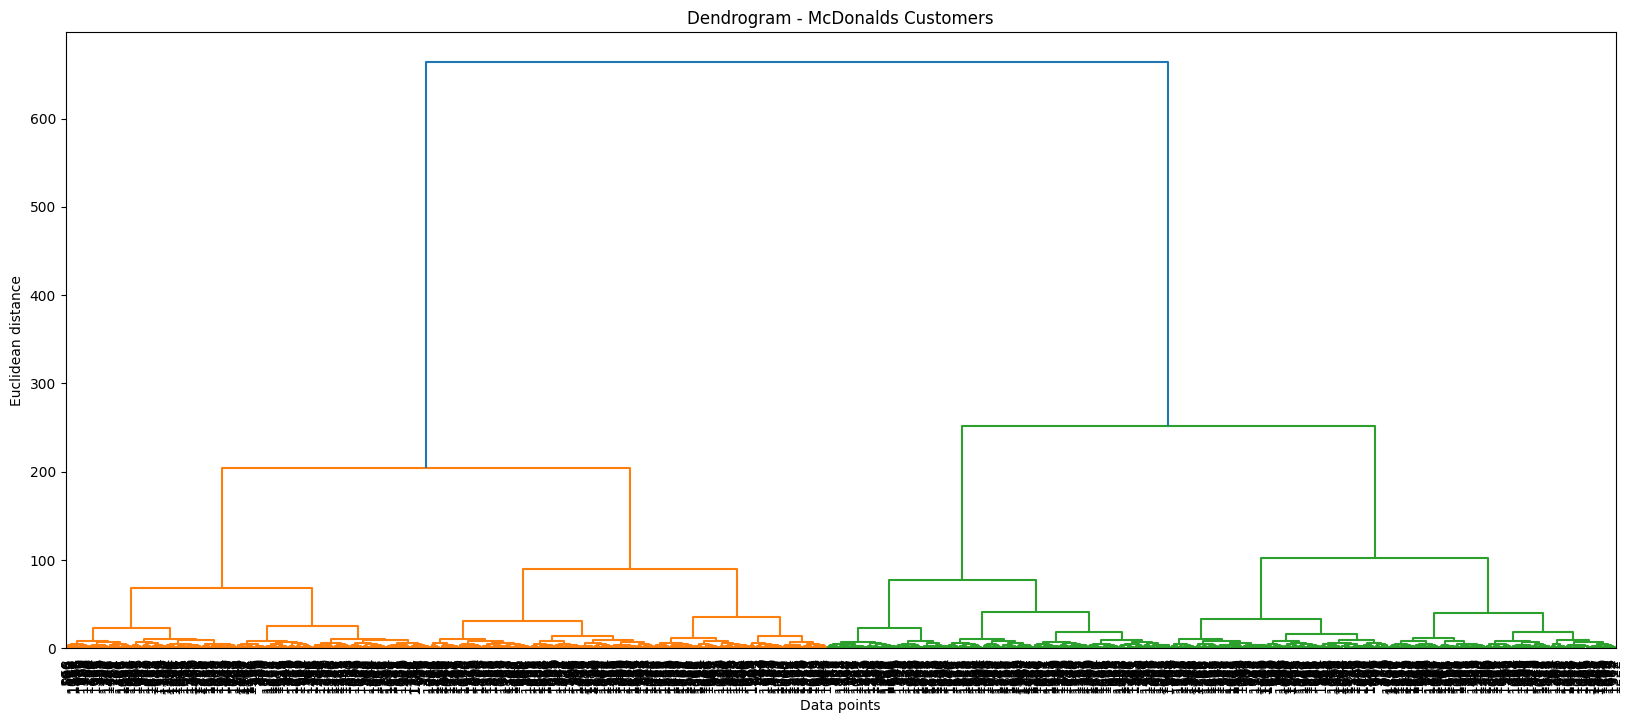

In [24]:
plt.figure(figsize=(20,8))
linked = linkage(X, method='ward')
dendrogram(linked, leaf_rotation=90, leaf_font_size=10)
plt.title('Dendrogram - McDonalds Customers')
plt.xlabel('Data points')
plt.ylabel('Euclidean distance')
plt.show()


### Agglomerative Clustering model & scatter plot


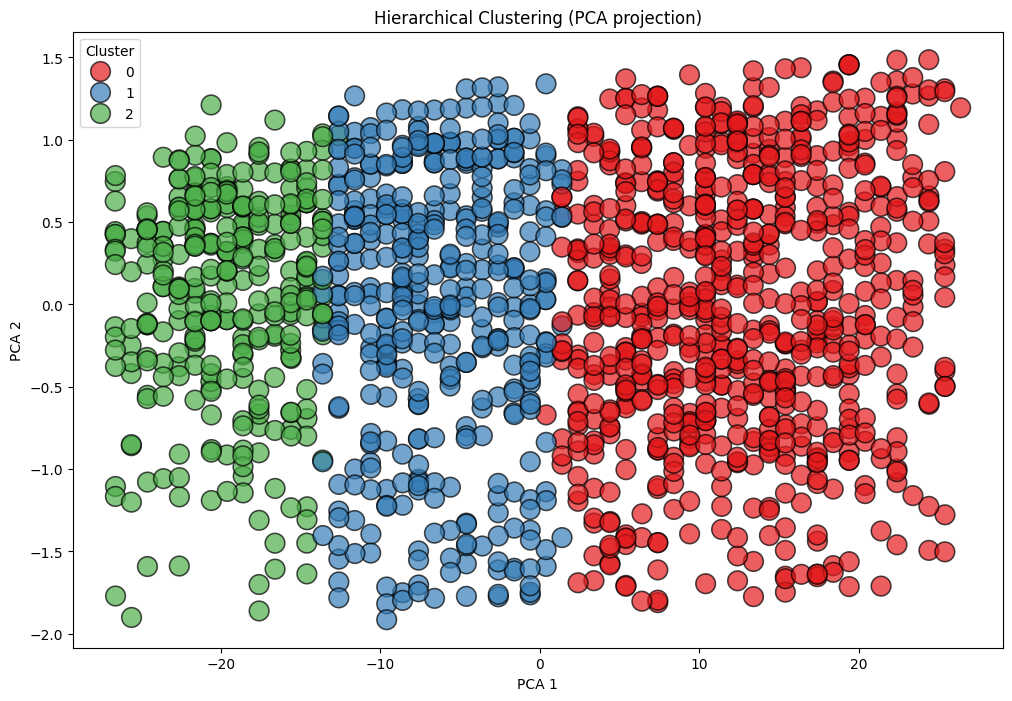

In [25]:
agglo = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')

agglo_labels = agglo.fit_predict(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(12,8))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=agglo_labels, palette='Set1', s=200, alpha=0.7, edgecolor='black')
plt.title('Hierarchical Clustering (PCA projection)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()


### Determining Optimal Number of Clusters (Elbow Method)
---


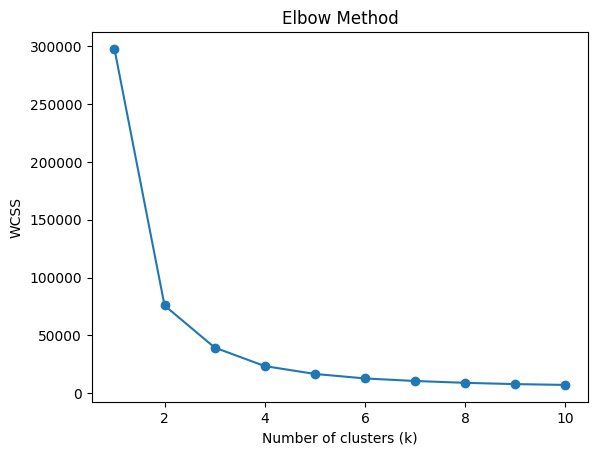

In [26]:
X = df_encoded.drop(columns=['Like'])
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()


### KMeans Clustering Model
---


C:\Users\ABHISHEK\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


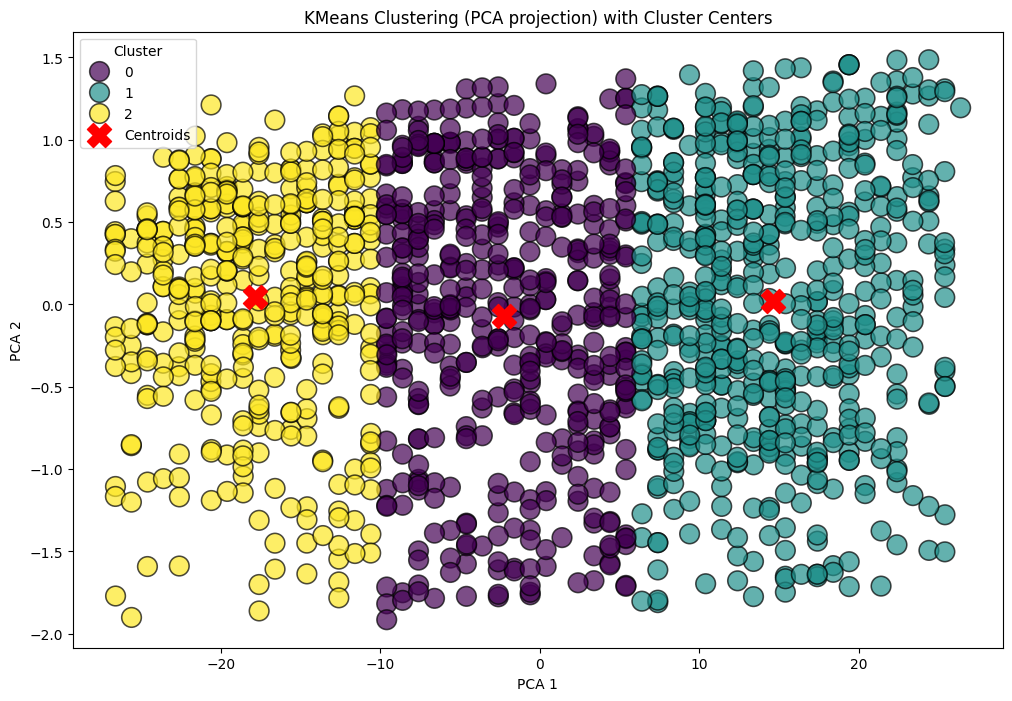

In [27]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X)
centers_pca = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(12,8))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=kmeans_labels, palette='viridis', s=200, alpha=0.7, edgecolor='black')
plt.scatter(centers_pca[:,0], centers_pca[:,1], c='red', s=300, marker='X', label='Centroids')
plt.title('KMeans Clustering (PCA projection) with Cluster Centers')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()


### KMeans Cluster Centers (Model Summary)
---


In [28]:
print("KMeans Cluster Centers (Model Parameters):")
centers_df = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centers_df


KMeans Cluster Centers (Model Parameters):


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Age,Gender_Male,VisitFrequency_More than once a week,VisitFrequency_Never,VisitFrequency_Once a month,VisitFrequency_Once a week,VisitFrequency_Once a year
0,0.526087,0.904348,0.078261,0.884783,0.504348,0.873913,0.530435,0.617391,0.430435,0.208696,0.271739,42.369565,0.482609,0.028261,0.067391,0.334783,0.186957,0.150000
1,0.421144,0.890815,0.136915,0.818024,0.419411,0.909879,0.636049,0.561525,0.294627,0.202773,0.242634,59.239168,0.436742,0.022530,0.142114,0.235702,0.081456,0.237435
2,0.764423,0.935096,0.050481,0.915865,0.699519,0.915865,0.622596,0.788462,0.365385,0.182692,0.211538,26.778846,0.459135,0.067308,0.043269,0.358173,0.245192,0.110577
